# Import Libraries

In [1]:
with open('Labels_TargetFeatures.txt') as LabelsName:
    Target = LabelsName.readline().strip()
    Features = LabelsName.readline().split()

# General Sub-Model 

The four sub-models have the same architecture:
1. Feature transformation
2. Feature selection
3. Clustering algorithm
4. Output probabilities

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

# Loading Dataset
ObesityDataset_Groups = pd.read_csv('../Exploratory_Data_Analysis/ObesityLevel_Groups.csv',index_col=0)
X_features_groups = ObesityDataset_Groups[Features].to_numpy()
y_target_groups = ObesityDataset_Groups[Target].to_numpy()

# Split train-test
X_train , X_test , y_train , y_test = train_test_split(X_features_groups,y_target_groups,test_size=0.2)

<Axes: xlabel='Weight', ylabel='Height'>

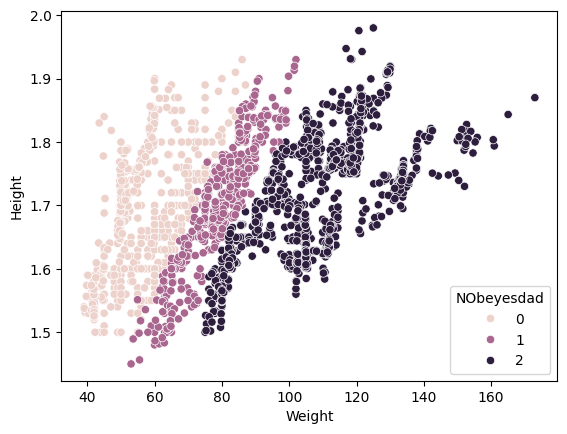

In [3]:
# Expected Result
import seaborn as sns

sns.scatterplot(ObesityDataset_Groups,x='Weight',y='Height',hue='NObeyesdad')

(np.float64(0.5496692922326888),
 np.float64(0.5322743109273936),
 np.float64(0.5408319674085892))

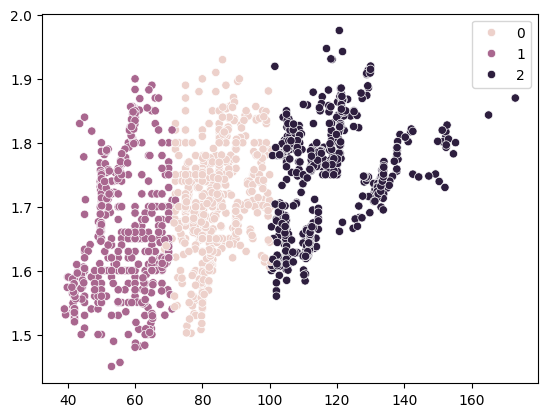

In [51]:
"""
1° Model ::
    -- Feature Selection
    -- Clustering Algorithm
"""

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_classif , SelectPercentile
from sklearn.cluster import KMeans

from sklearn.metrics import homogeneity_completeness_v_measure

ScoreFunction_MutualInformation = lambda X,y : mutual_info_classif(X,y,n_neighbors=30)

Model_K_Means = Pipeline(steps=[
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=50)),
                                ('Clustering',KMeans(n_clusters=3,n_init=20)),
                               ]
                        )

y_pred = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_pred)

homogeneity_completeness_v_measure(y_train,y_pred)

(np.float64(0.5576007547395156),
 np.float64(0.5402022078135756),
 np.float64(0.5487636107089394))

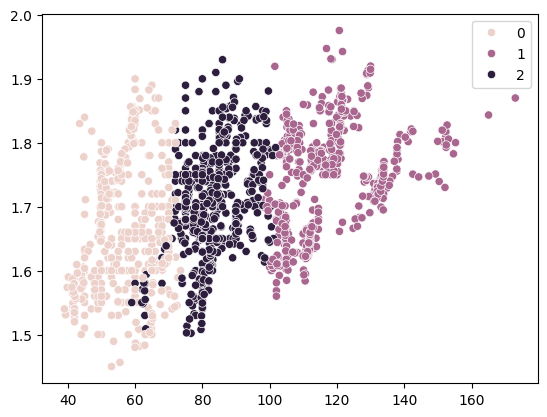

In [55]:
"""
2° Model ::
    -- Feature Selection
    -- Feature Transformation :: NCA
    -- Clustering Algorithm
"""

from sklearn.neighbors import NeighborhoodComponentsAnalysis

Model_K_Means = Pipeline(steps=[
                                ('Feature_Selection',SelectPercentile(score_func=ScoreFunction_MutualInformation,percentile=25)),
                                ('Feature_Transformation',NeighborhoodComponentsAnalysis(init='identity')),
                                ('Clustering',KMeans(n_clusters=3,n_init=20)),
                               ]
                        )

y_pred = Model_K_Means.fit_predict(X_train,y_train)
sns.scatterplot(x=X_train[:,2],y=X_train[:,1],hue=y_pred)

homogeneity_completeness_v_measure(y_train,y_pred)